<a href="https://colab.research.google.com/github/i-bukhari/Responsible-AI/blob/main/Membership_Inference_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Membership Inference Attack (MIA)
## Responsible AI using Ethical Algorithm Design


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle

#Import Dataset

In [ ]:
url = "https://www.cis.upenn.edu/~mkearns/teaching/EADSpring24/california_housing_train.csv"

data = pd.read_csv(url)

data.head()

#Normalize the Dataset

In [ ]:
data_normalized = (data - data.min()) / (data.max() - data.min())

data_normalized.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   1.000000  0.175345            0.274510     0.147885        0.198945   
1   0.984064  0.197662            0.352941     0.201608        0.294848   
2   0.975100  0.122210            0.313725     0.018927        0.026847   
3   0.974104  0.116897            0.254902     0.039515        0.052142   
4   0.974104  0.109458            0.372549     0.038276        0.050435   

   population  households  median_income  median_house_value  
0    0.028364    0.077454       0.068530            0.107012  
1    0.031559    0.075974       0.091040            0.134228  
2    0.009249    0.019076       0.079378            0.145775  
3    0.014350    0.037000       0.185639            0.120414  
4    0.017405    0.042921       0.098281            0.104125

#Laplace Mechanism (LM)

In [ ]:
def laplace_mechanism(true_value, epsilon, sensitivity):
    b = sensitivity / epsilon
    noise = np.random.laplace(0, b)
    return true_value + noise

# Membership Inference Attack (MIA)

In [ ]:
def mia(f, x, x_prime, y):
    f_x = f(x)
    f_x_prime = f(x_prime)
    return "input was x" if np.abs(f_x - y) <= np.abs(f_x_prime - y) else "input was x'"

# 1000 Trials

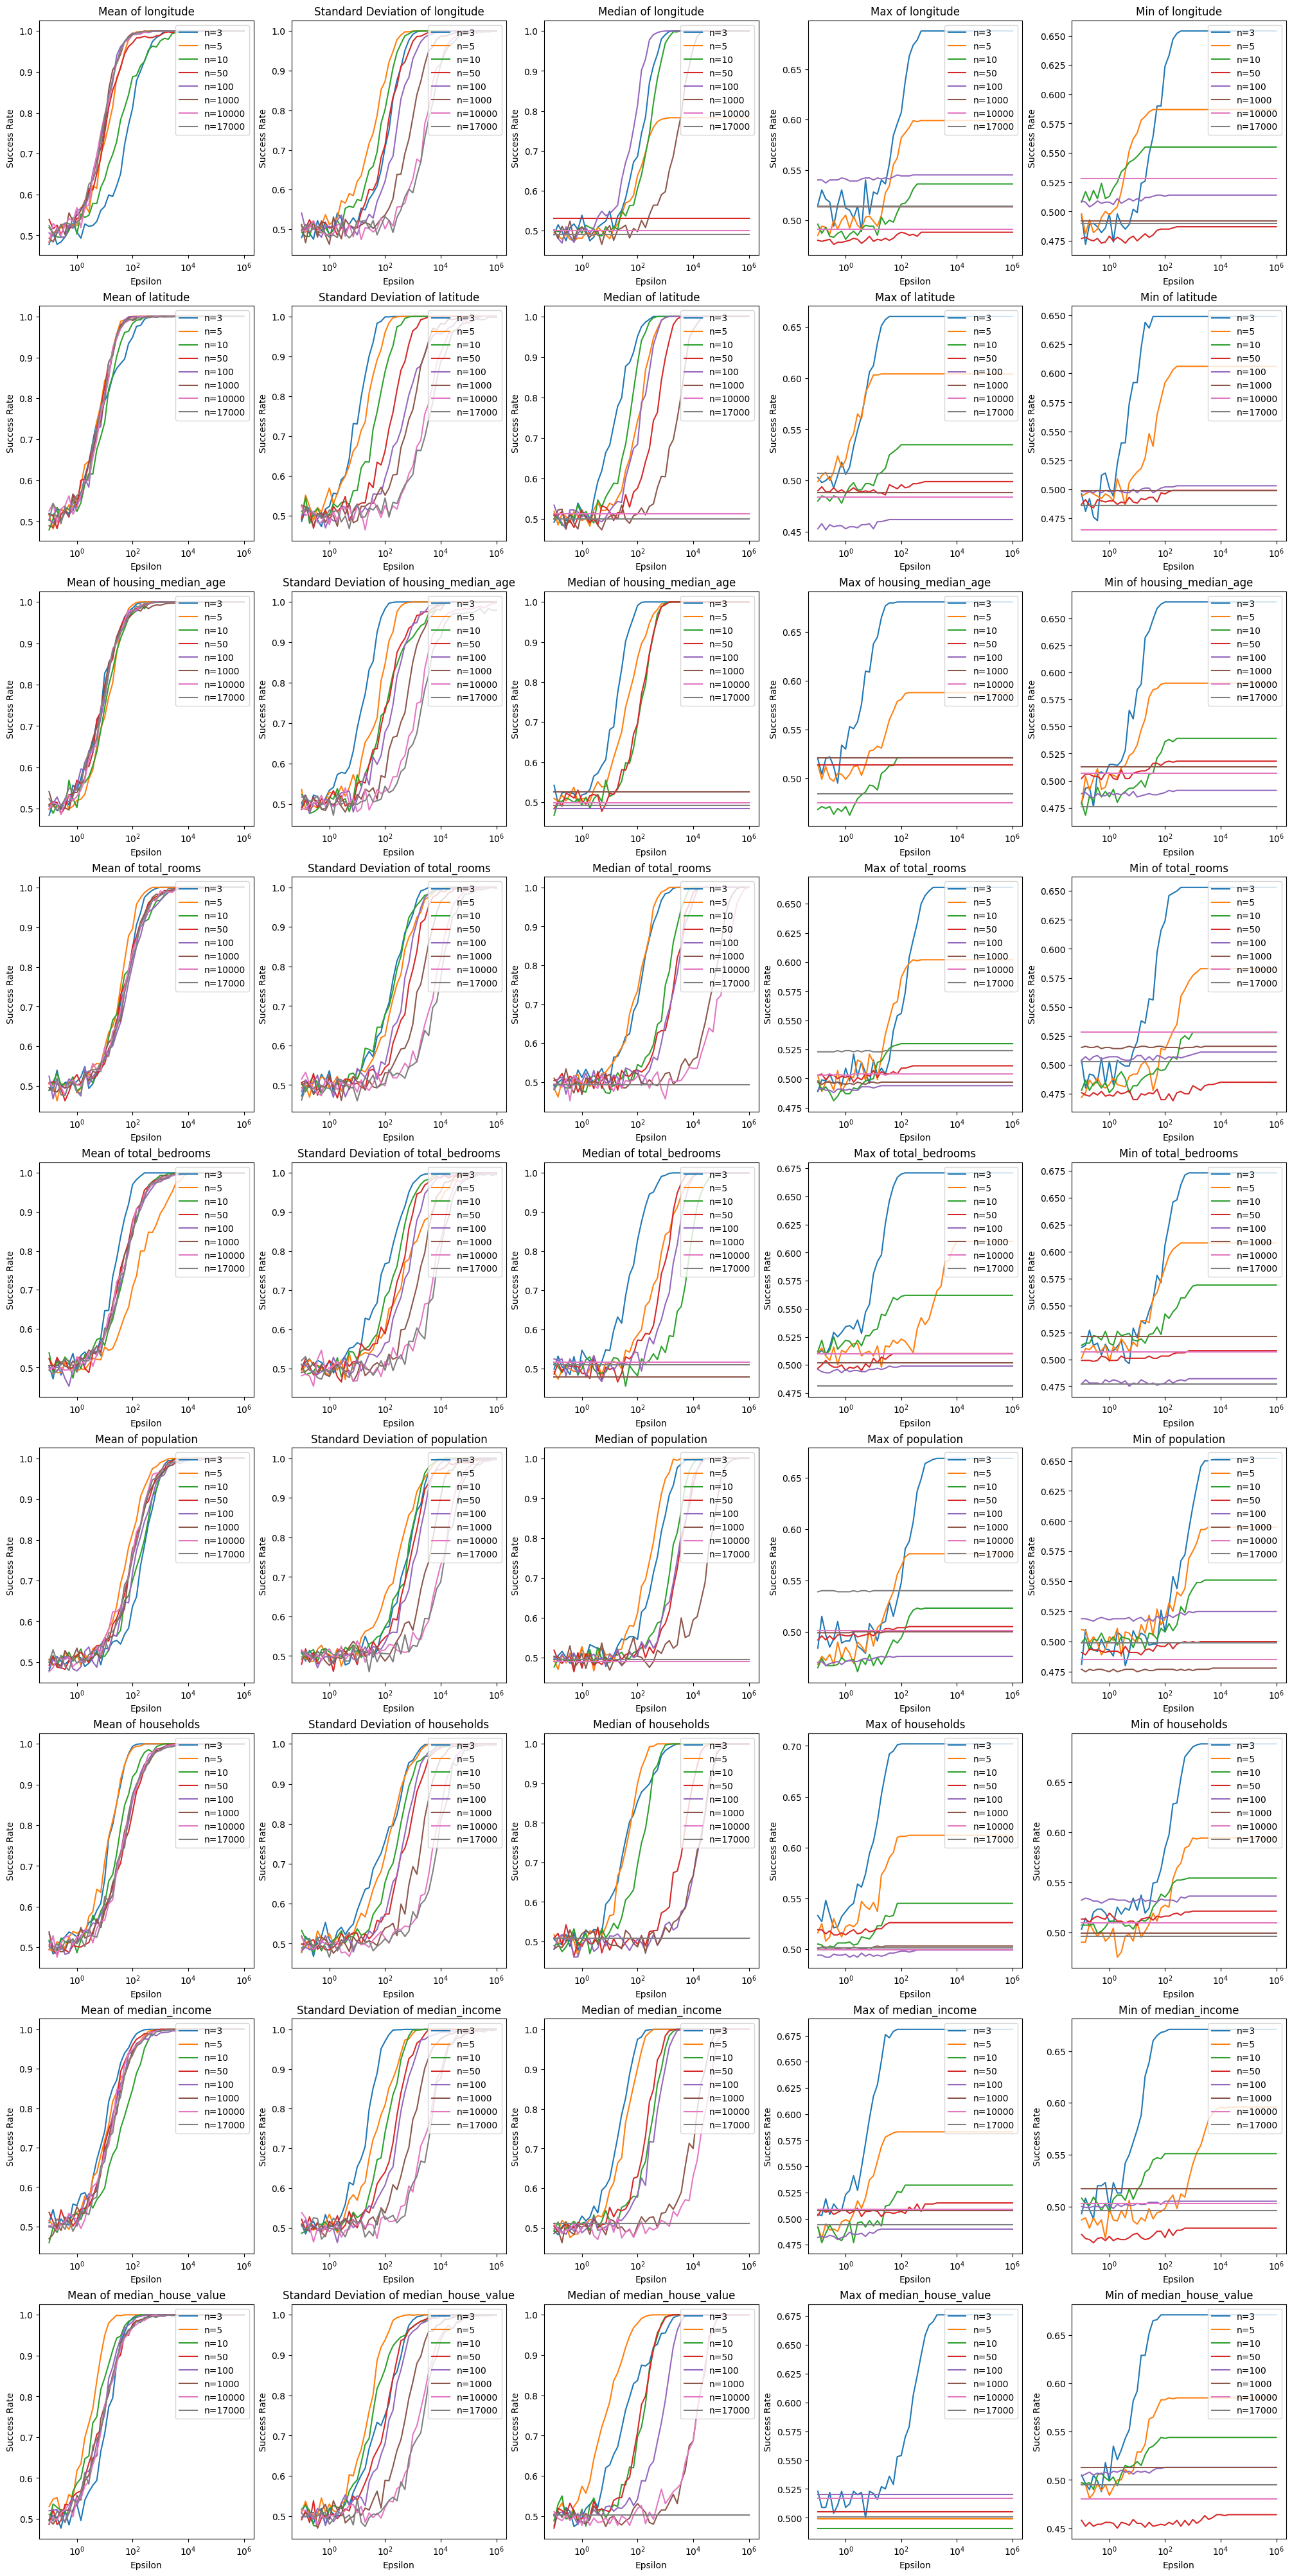

In [ ]:
statistics_functions = {
    'Mean': np.mean,
    'Standard Deviation': np.std,
    'Median': np.median,
    'Max': np.max,
    'Min': np.min
}

epsilons = np.geomspace(0.1, 1e6, num=50)
n_values = [3, 5, 10, 50, 100, 1000, 10000, 17000]

results = {col: {fn: {n: [] for n in n_values} for fn in statistics_functions} for col in data_normalized.columns}

for col in data_normalized.columns:
    for n in n_values:
        sample = data_normalized[col].sample(n=n, replace=False).values
        for stat_name, stat_func in statistics_functions.items():
            sensitivity = {
                'Mean': 1 / n,
                'Median': 1,
                'Standard Deviation': 1 / np.sqrt(n),
                'Max': 1,
                'Min': 1
            }[stat_name]

            correct_guesses = np.zeros(len(epsilons))
            trials = 1000
            for trial in range(trials):
                idx_to_remove = np.random.randint(0, n)
                x_prime = np.delete(sample, idx_to_remove)

                # Decide if z is x or x'
                z = x_prime if np.random.rand() < 0.5 else sample
                f_z = stat_func(z)
                y = laplace_mechanism(f_z, epsilons, sensitivity)

                # Plug into mia function to guess
                guess = [mia(stat_func, sample, x_prime, y_val) for y_val in y]
                correct_guesses += np.array(guess) == ("input was x" if z is sample else "input was x'")

            # Accuracy
            accuracy = correct_guesses / trials
            results[col][stat_name][n] = accuracy.tolist()

# Plot
fig, axs = plt.subplots(len(data_normalized.columns), len(statistics_functions), figsize=(20, 40), constrained_layout=True)
for col_idx, col in enumerate(data_normalized.columns):
    for stat_idx, (stat_name, accuracies_dict) in enumerate(results[col].items()):
        ax = axs[col_idx][stat_idx]
        for n, accuracies in accuracies_dict.items():
            ax.plot(epsilons, accuracies, label=f'n={n}')
        ax.set_xscale('log')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Success Rate')
        ax.set_title(f'{stat_name} of {col}')
        ax.legend(loc='upper right')
plt.show()


# 5K Trials
runtime: 1hr 26min


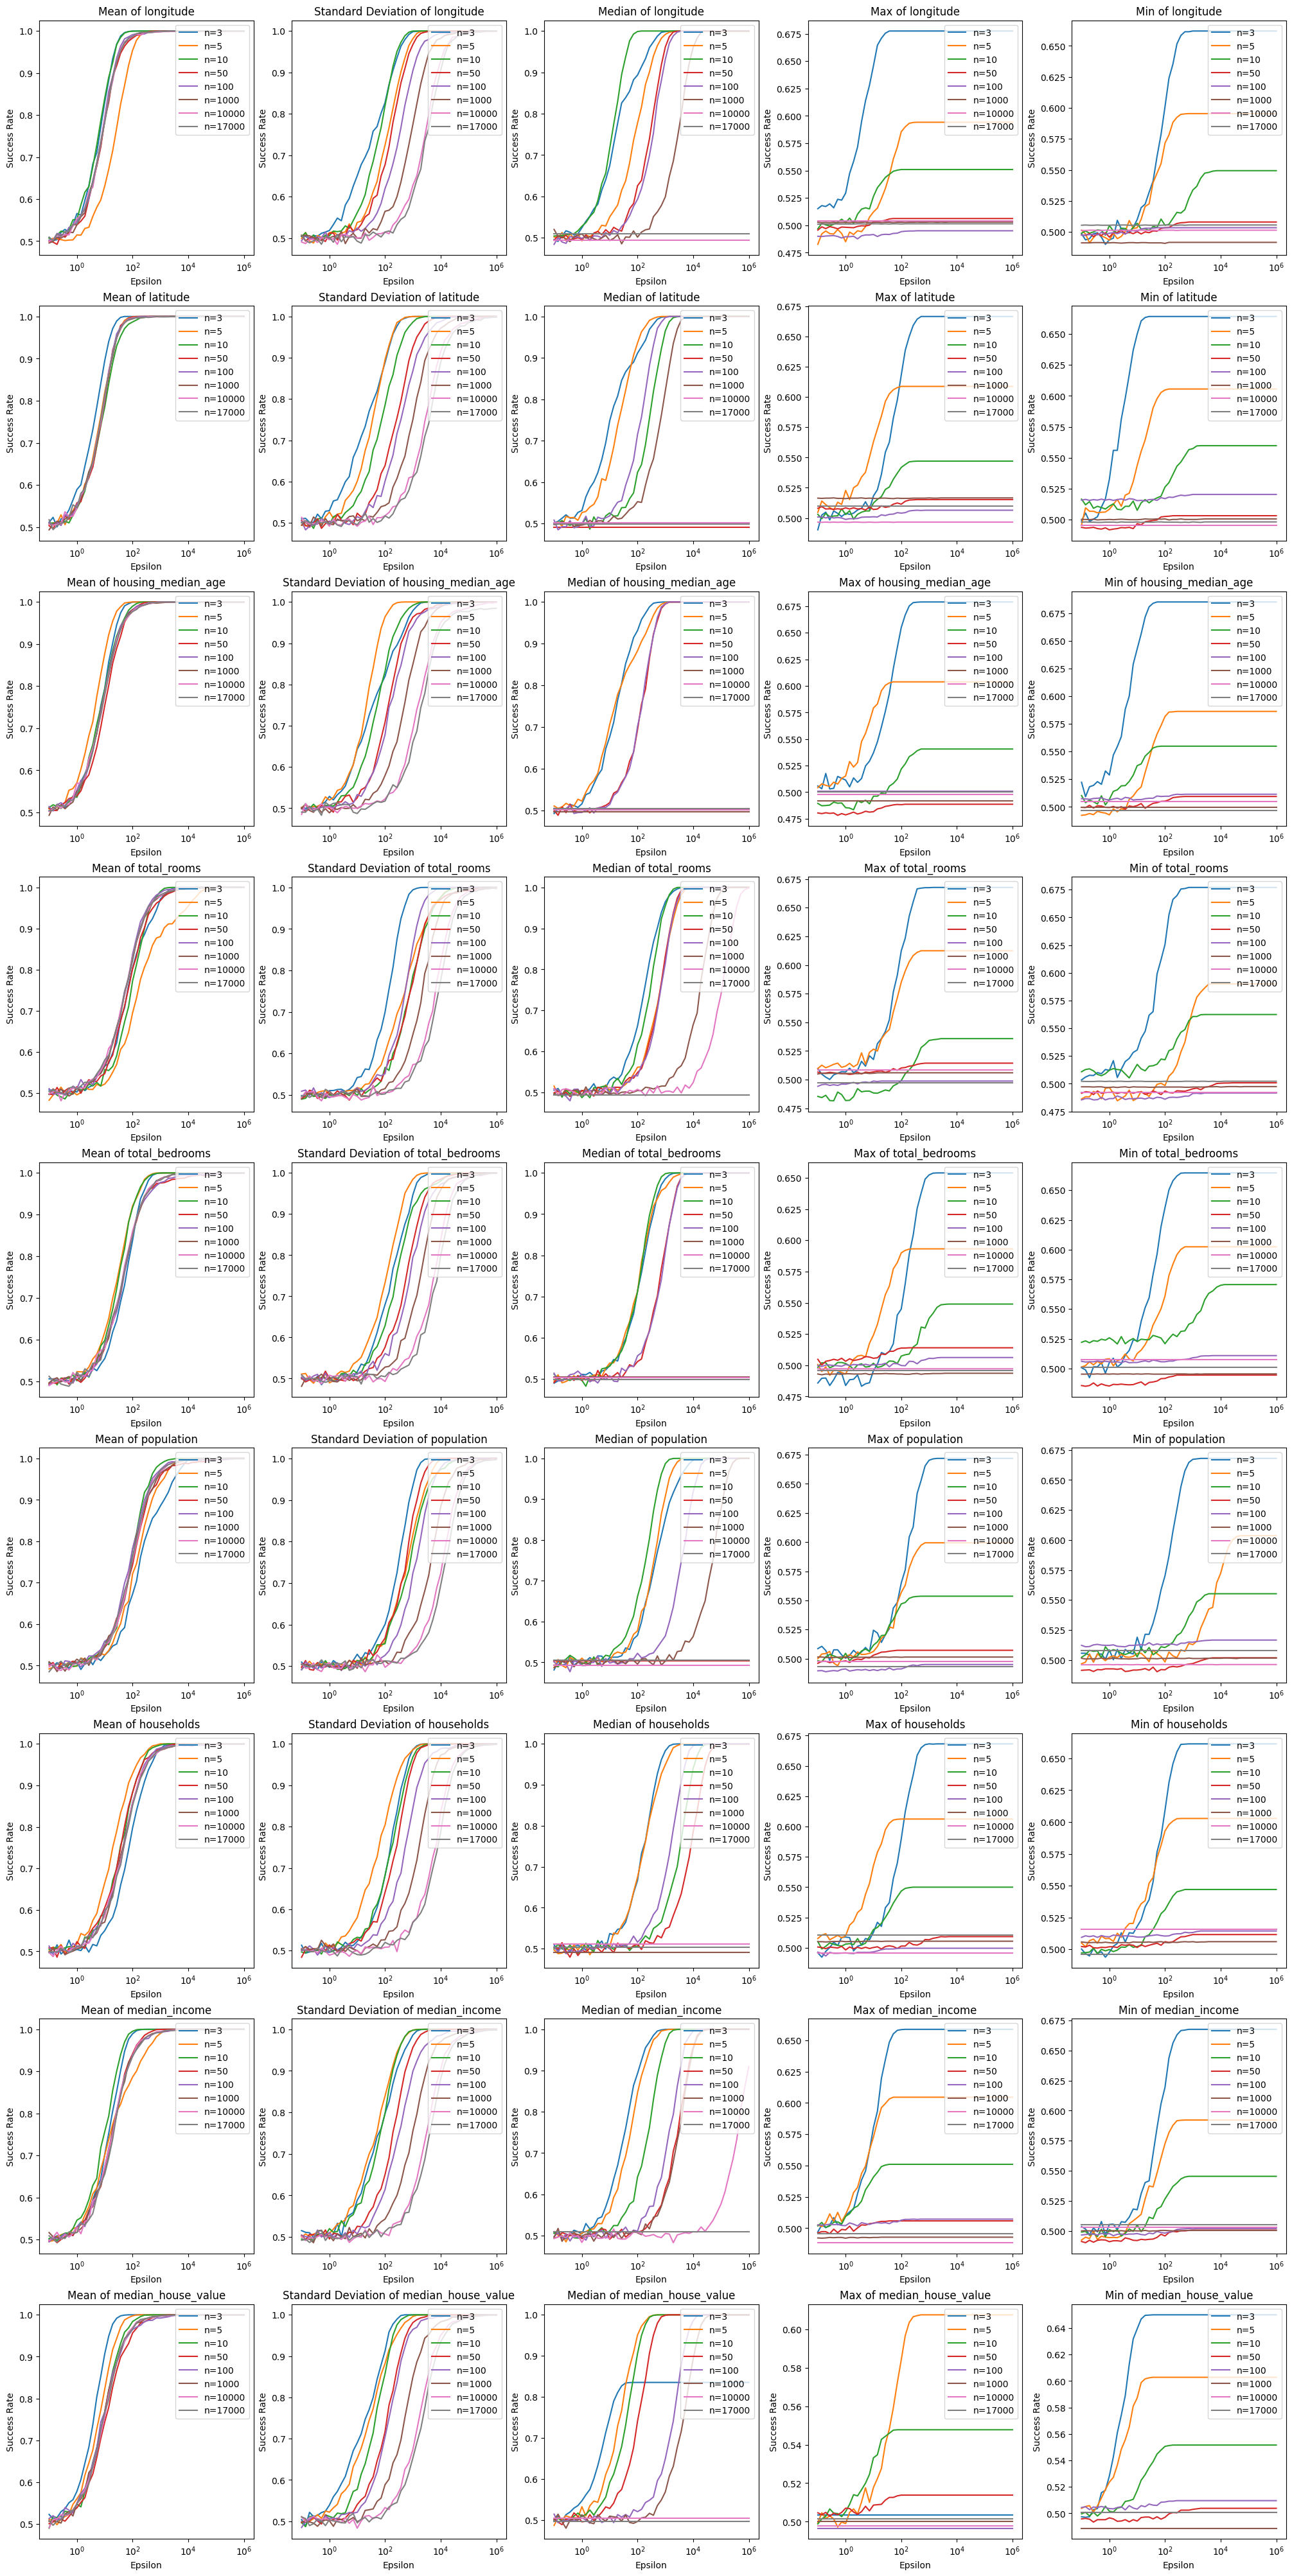

In [ ]:
statistics_functions = {
    'Mean': np.mean,
    'Standard Deviation': np.std,
    'Median': np.median,
    'Max': np.max,
    'Min': np.min
}

epsilons = np.geomspace(0.1, 1e6, num=50)
n_values = [3, 5, 10, 50, 100, 1000, 10000, 17000]

results = {col: {fn: {n: [] for n in n_values} for fn in statistics_functions} for col in data_normalized.columns}

for col in data_normalized.columns:
    for n in n_values:
        sample = data_normalized[col].sample(n=n, replace=False).values
        for stat_name, stat_func in statistics_functions.items():
            sensitivity = {
                'Mean': 1 / n,
                'Median': 1,
                'Standard Deviation': 1 / np.sqrt(n),
                'Max': 1,
                'Min': 1
            }[stat_name]

            correct_guesses = np.zeros(len(epsilons))
            trials = 5000
            for trial in range(trials):
                idx_to_remove = np.random.randint(0, n)
                x_prime = np.delete(sample, idx_to_remove)

                # Decide if z is x or x'
                z = x_prime if np.random.rand() < 0.5 else sample
                f_z = stat_func(z)
                y = laplace_mechanism(f_z, epsilons, sensitivity)

                # Plug into mia function to guess
                guess = [mia(stat_func, sample, x_prime, y_val) for y_val in y]
                correct_guesses += np.array(guess) == ("input was x" if z is sample else "input was x'")

            # Accuracy
            accuracy = correct_guesses / trials
            results[col][stat_name][n] = accuracy.tolist()

# Plot
fig, axs = plt.subplots(len(data_normalized.columns), len(statistics_functions), figsize=(20, 40), constrained_layout=True)
for col_idx, col in enumerate(data_normalized.columns):
    for stat_idx, (stat_name, accuracies_dict) in enumerate(results[col].items()):
        ax = axs[col_idx][stat_idx]
        for n, accuracies in accuracies_dict.items():
            ax.plot(epsilons, accuracies, label=f'n={n}')
        ax.set_xscale('log')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Success Rate')
        ax.set_title(f'{stat_name} of {col}')
        ax.legend(loc='upper right')
plt.show()

# 10K Trials
runtime = 2hr 48min

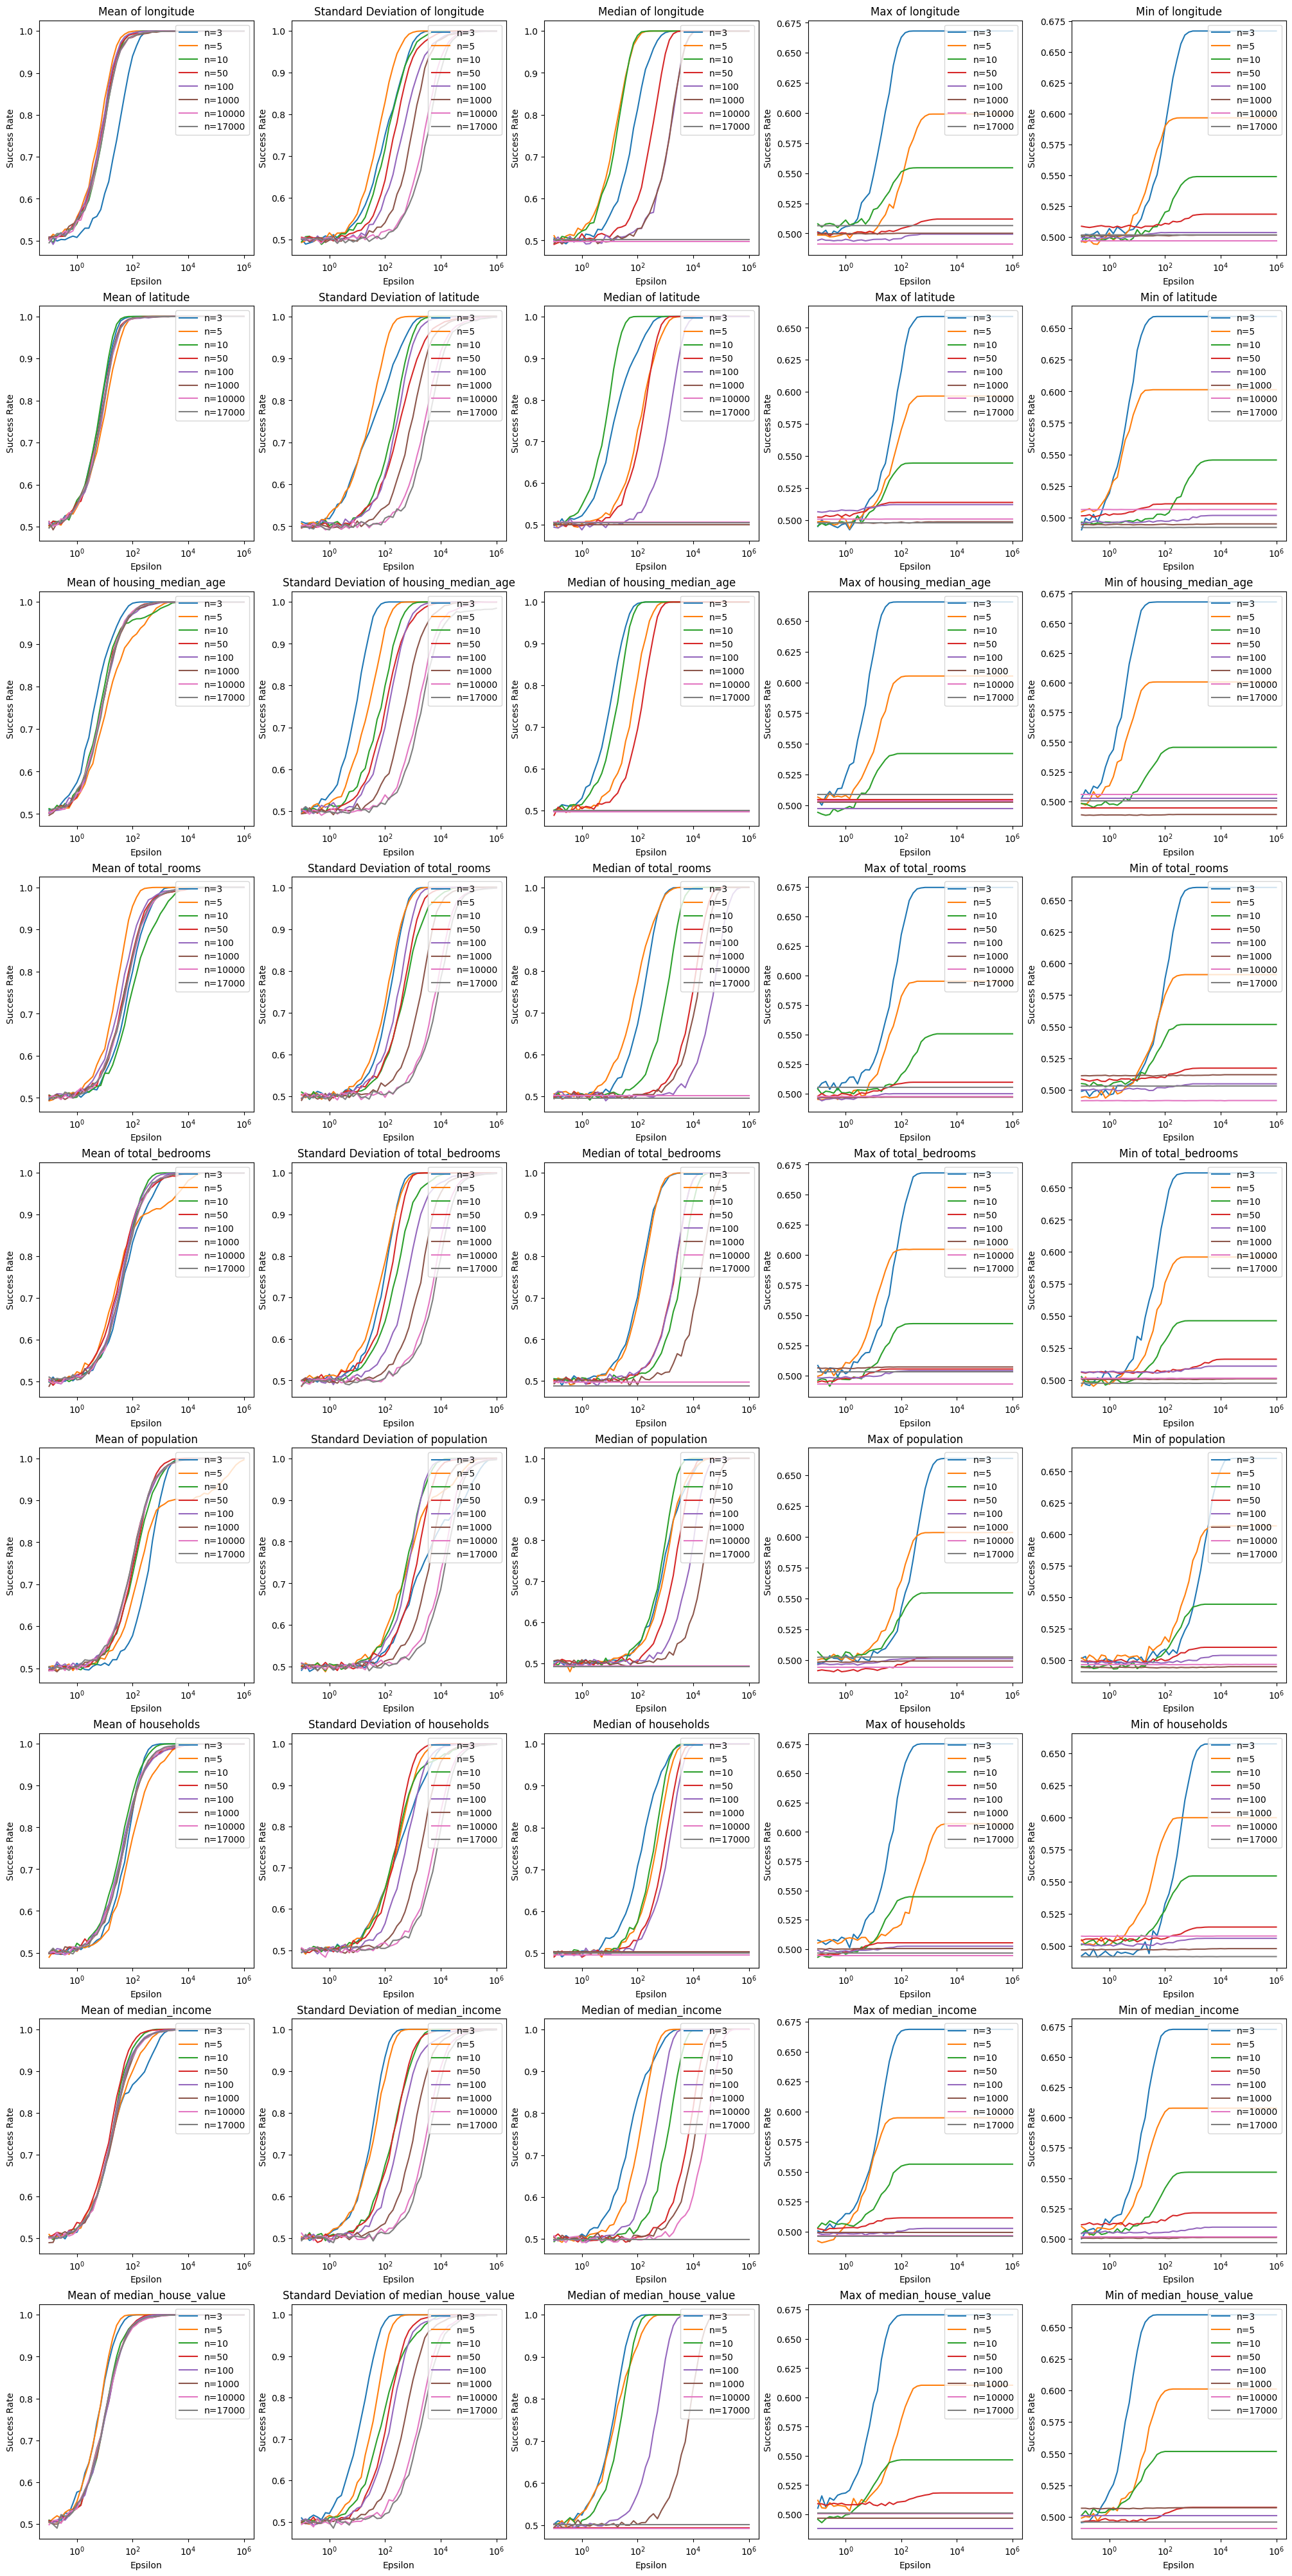

In [ ]:
statistics_functions = {
    'Mean': np.mean,
    'Standard Deviation': np.std,
    'Median': np.median,
    'Max': np.max,
    'Min': np.min
}

epsilons = np.geomspace(0.1, 1e6, num=50)
n_values = [3, 5, 10, 50, 100, 1000, 10000, 17000]

results = {col: {fn: {n: [] for n in n_values} for fn in statistics_functions} for col in data_normalized.columns}

for col in data_normalized.columns:
    for n in n_values:
        sample = data_normalized[col].sample(n=n, replace=False).values
        for stat_name, stat_func in statistics_functions.items():
            sensitivity = {
                'Mean': 1 / n,
                'Median': 1,
                'Standard Deviation': 1 / np.sqrt(n),
                'Max': 1,
                'Min': 1
            }[stat_name]

            correct_guesses = np.zeros(len(epsilons))
            trials = 10000
            for trial in range(trials):
                idx_to_remove = np.random.randint(0, n)
                x_prime = np.delete(sample, idx_to_remove)

                # Decide if z is x or x'
                z = x_prime if np.random.rand() < 0.5 else sample
                f_z = stat_func(z)
                y = laplace_mechanism(f_z, epsilons, sensitivity)

                # Plug into mia function to guess
                guess = [mia(stat_func, sample, x_prime, y_val) for y_val in y]
                correct_guesses += np.array(guess) == ("input was x" if z is sample else "input was x'")

            # Accuracy
            accuracy = correct_guesses / trials
            results[col][stat_name][n] = accuracy.tolist()

# Plot
fig, axs = plt.subplots(len(data_normalized.columns), len(statistics_functions), figsize=(20, 40), constrained_layout=True)
for col_idx, col in enumerate(data_normalized.columns):
    for stat_idx, (stat_name, accuracies_dict) in enumerate(results[col].items()):
        ax = axs[col_idx][stat_idx]
        for n, accuracies in accuracies_dict.items():
            ax.plot(epsilons, accuracies, label=f'n={n}')
        ax.set_xscale('log')
        ax.set_xlabel('Epsilon')
        ax.set_ylabel('Success Rate')
        ax.set_title(f'{stat_name} of {col}')
        ax.legend(loc='upper right')
plt.show()


#Analysis

We have been exploring the challenges of balancing data utility with individual privacy through the implementation of differential privacy. In this notebook, we analyzed the Membership Inference Attack (MIA), while in the previous notebook, we analyzed the Laplace Mechanism (LM). These projects delve into the nuanced dynamics of privacy and utility by manipulating the differential privacy parameter epsilon, thus providing a comprehensive view of the trade-offs involved in data protection.

In this notebook, the core analysis centered on MIA, where the success rate of inferring whether an individual's data was used in a dataset was plotted against varying epsilon levels. The results, particularly from 10,000 trials, showed a direct correlation between the success rate of MIA and the value of epsilon. As epsilon increased, suggesting less noise and greater data fidelity, the success rate of MIA also rose. This increase is logical because lesser noise allows the data model's outputs to mirror the actual data more closely, facilitating easier membership inference.

The analysis in the MIA notebook went further by examining how the success of MIA varied with the function used (mean, standard deviation, or median) and the length of the prefix in queries. Notably, aggregate functions like the mean and standard deviation displayed more robustness against MIA at higher epsilon levels, attributed to their ability to dilute individual data contributions. In contrast, the length of the prefix, which pertains to the amount of data included in each query, showed that longer prefixes could enhance privacy by providing additional 'cover' for individual data points.

Contrasting these results with those from the LM notebook, where the Laplace mechanism was applied to evaluate the impact of noise on statistical outputs like mean and median, we observed a clear inverse relationship between privacy and utility. As epsilon decreased, introducing more noise for increased privacy, the accuracy of statistical analyses correspondingly declined. This behavior underscores the core principle of differential privacy, where noise addition serves to protect individual data points, albeit at a potential cost to utility.

The plots from LM notebook were particularly illustrative, showing how, as epsilon reduced from values like 5 to 0.1, the accuracy of calculating the median became notably erratic, emphasizing its sensitivity to noise compared to the mean, which remained relatively stable across various epsilon values.

Both MIA and LM notebooks highlighted the fundamental trade-off central to differential privacy—the balance between adding sufficient noise to ensure privacy (lower epsilon) and reducing noise to maintain data utility (higher epsilon). This dynamic was clearly depicted in the analyses and plots, with HW3 showing increased MIA success with less noise and HW2 demonstrating decreased data utility with more noise.

These findings are perfectly aligned with the principles of differential privacy, which advocate for the protection of individual data points through noise addition, even though this may impact the overall utility of the data. Understanding these principles is vital for designing systems that can effectively leverage differential privacy to protect sensitive information while still facilitating meaningful data analysis. The comparative analysis of MIA and LM notebooks provides a practical perspective on how adjustments in epsilon influence both the risk of data inference and the quality of statistical outputs, thus aiding in the development of data processing systems that are both useful and privacy-preserving.

**Trials (1,000, 5,000, and 10,000)**

In the evolution of the MIA analysis through 1,000, 5,000, and 10,000 trials, we observed marked improvements in the consistency and reliability of the plots as the number of trials increased. Initially, at 1,000 trials, the plots were somewhat erratic, displaying considerable variability in the success rates of MIA across different epsilon values. This variability likely stemmed from insufficient data points to smooth out the randomness inherent in each trial.

As the number of trials increased to 5,000, the plots began to show more stability, with less fluctuation and a clearer trend line illustrating the relationship between epsilon and the success rate of MIA. This improvement suggested that the increased sample size provided a more robust dataset, reducing the impact of outliers and random variation on the observed trends.

By the time we reached 10,000 trials, the plots were significantly more refined, offering a smooth and consistent visualization that reliably demonstrated the direct correlation between the success rate of MIA and the epsilon value. This level of trials ensured that the data was sufficiently representative to accurately reflect the underlying patterns, making it easier to draw concrete conclusions about the effectiveness of differential privacy settings in thwarting membership inference attacks. These refinements in the plots underscored the importance of large-scale testing in achieving dependable analytical results, crucial for informing the development of privacy-preserving technologies.

**Challenges and Difficulties**

Throughout the process of generating the MIA plots, several significant challenges were encountered, particularly related to the performance and interpretation of results. One of the primary issues was the long runtimes experienced due to the initial non-vectorized approach in handling large datasets and numerous trials. This inefficiency was especially pronounced when applying statistical functions and noise mechanisms repeatedly within a loop for each trial and dataset configuration. To address this, a shift towards vectorization of the code was essential, reducing my 1000 trials run from taking over 1 hour to under 20 minutes. By leveraging NumPy's vectorized operations, the runtime of simulations was considerably reduced, allowing for more efficient processing of large arrays of data without explicitly iterating over them.

However, even with improved computational times, there were still unforeseen deviations in the resultant plots that needed careful interpretation. For instance, the median function displayed an initial success rate starting from 0.5, suggesting that the noise level might be making it effectively random at lower epsilon values, thereby reflecting a 50% guess rate. Similarly, the maximum and minimum functions demonstrated a peculiar behavior, where their success rates eventually reached 1.0 across all tested values of epsilon. This indicated that these statistics were perhaps too distinctive or the noise added was not sufficient to mask their values effectively, leading to perfect inference by the MIA regardless of the noise parameters. These observations highlighted the presenence on preliminary issues in my code, leading me to the reassess my simulation loop, deciding the value of z, and implementing the mia function correctly.